### 실습 개요
- 다양한 속성을 가진 이미지 array(3차원)를 생성하고 시각화합니다.
- 다양한 이미지 array들 간에 유사도를 측정합니다.
- Video array의 연속되는 두 이미지(frame)들 간의 유사도의 의미를 분석합니다.

### 사전준비
- functions.py 안에 mp4 파일 decoding 함수들을 import
- numpy를 import

In [1]:
# ../my_flask/functions.py 에 미리 정의된 함수들을 import 한다
from my_flask.functions import video_2_ndarray

# numpy를 import 한다
import numpy as np

- mp4 file의 video data를 ndarray(N-dimensional Array) 변수에 저장하기

In [2]:
"""
함수 video_2_ndarray 를 사용하여 ../media/SampleVideo_640x360_5mb.mp4 의 video data를
ndarray 에 저장한다.
"""
video_array, _, _ = video_2_ndarray('../media/SampleVideo_640x360_5mb.mp4')

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

### 따라 해보기 #1. 다차원 array(여기서는 video frame)들 간 유사도 측정하기

- 세로 : 360, 가로 : 640 사이즈의 다양한 test image array 들을 생성

In [3]:
black = np.zeros((360, 640, 3))
white = np.full((360, 640, 3), 255, dtype=np.uint8)
noisy1 = np.random.randint(0, 255, size=(360, 640, 3), dtype=np.uint8)
noisy2 = np.random.randint(0, 255, size=(360, 640, 3), dtype=np.uint8)
red = np.full((360, 640, 3), (255, 0, 0), dtype=np.uint8)
blue = np.full((360, 640, 3), (0, 0, 255), dtype=np.uint8)
light1 = np.full((360, 640, 3), 230, dtype=np.uint8)
light2 = np.full((360, 640, 3), 210, dtype=np.uint8)
dark1 = np.full((360, 640, 3), 20, dtype=np.uint8)
dark2 = np.full((360, 640, 3), 40, dtype=np.uint8)

# 1. R, G, B가 같은 값이면 흑백 색깔(gray)이 됨
# 2. 0~255 사이 random 값 추출  shape:(360, 640, 1)인 array를 만들고
#    같은 array를 세번째 차원(axis=2)에 2회 append 하여 3개 항목(R, G, B)이 같은 값을 가지도록 함 
a = np.random.randint(0, 255, size=(360, 640, 1), dtype=np.uint8)
b = np.append(a, a, axis=2)
gray_noisy1 = np.append(b, a, axis=2)

a = np.random.randint(0, 255, size=(360, 640, 1), dtype=np.uint8)
b = np.append(a, a, axis=2)
gray_noisy2 = np.append(b, a, axis=2)

- test image array들 출력

In [4]:
from matplotlib import pyplot as plt

(-0.5, 639.5, 359.5, -0.5)

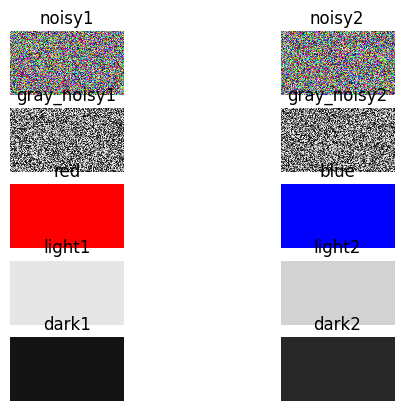

In [5]:
rows = 5
columns = 2

plt.subplot(rows, columns, 1)
plt.imshow(noisy1, interpolation='nearest')
plt.title('noisy1')
plt.axis('off')

plt.subplot(rows, columns, 2)
plt.imshow(noisy2, interpolation='nearest')
plt.title('noisy2')
plt.axis('off')

plt.subplot(rows, columns, 3)
plt.imshow(gray_noisy1, interpolation='nearest')
plt.title('gray_noisy1')
plt.axis('off')

plt.subplot(rows, columns, 4)
plt.imshow(gray_noisy2, interpolation='nearest')
plt.title('gray_noisy2')
plt.axis('off')

plt.subplot(rows, columns, 5)
plt.imshow(red, interpolation='nearest')
plt.title('red')
plt.axis('off')

plt.subplot(rows, columns, 6)
plt.imshow(blue, interpolation='nearest')
plt.title('blue')
plt.axis('off')

plt.subplot(rows, columns, 7)
plt.imshow(light1, interpolation='nearest')
plt.title('light1')
plt.axis('off')

plt.subplot(rows, columns, 8)
plt.imshow(light2, interpolation='nearest')
plt.title('light2')
plt.axis('off')

plt.subplot(rows, columns, 9)
plt.imshow(dark1, interpolation='nearest')
plt.title('dark1')
plt.axis('off')

plt.subplot(rows, columns, 10)
plt.imshow(dark2, interpolation='nearest')
plt.title('dark2')
plt.axis('off')

- test image array들를 벡터화(vectorization) 하기

In [ ]:
# 다차원를 1차원으로 vectorize(또는 직렬화)한다.
noisy1_vector = noisy1.reshape(-1)

# 그 결과를 255로 나누어 각 항목의 값이 0 ~ 1 사이의 float 값을 가지도록 한다.
noisy1_vector = noisy1_vector/255

noisy2_vector = noisy2.reshape(-1)/255

red_vector = red.reshape(-1)/255
blue_vector = blue.reshape(-1)/255

light1_vector = light1.reshape(-1)/255
light2_vector = light2.reshape(-1)/255
dark1_vector = dark1.reshape(-1)/255
dark2_vector = dark2.reshape(-1)/255
gray_noisy1_vector = gray_noisy1.reshape(-1)/255
gray_noisy2_vector = gray_noisy2.reshape(-1)/255

# 0과 1사이 난수 출력
print('noisy1_vector : ', noisy1_vector)

# 1에 근접하는 동일한 값 출력
print('light1_vector : ', light1_vector)

# 0에 근접하는 동일한 값 출력
print('dark1_vector : ', dark1_vector)

# 0, 0, 1, 0, 0, 1... 반복 출력
print('blue_vector : ', blue_vector)

# 0과 1사이 난수가 3회씩 반복 출력
print('gray_noisy1_vector : ', gray_noisy1_vector)


- 쉽고 간단한 유사도 측정 방법 cosine similatiry 소개

In [ ]:
from numpy import dot
from numpy.linalg import norm

# cosine similatiry 함수
def cos_sim(A, B):
    return dot(A, B) / (norm(A) * norm(B))

- 그림 : cosine similarity 함수 이해
    - image vector의 모든 값은 0 ~ 1 이므로 마이너스 유사도(opposite vectors)는 나타나지 않음. 최소값은 0

In [ ]:
# 그림 : cosine similarity 함수 이해
import matplotlib.image as mpimg

# Load an image file
img = mpimg.imread('../resources/cosine-similarity-vectors.jpg')

# Display the image
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')

- cosine similatiry 함수를 사용한 유사도 구하기

In [ ]:
# dark1과 dark2 간 유사도
print('dark1과 dark2 간 유사도 : ', cos_sim(dark1_vector, dark2_vector))

# light1과 light2 간 유사도
print('light1과 light2 간 유사도 : ', cos_sim(light1_vector, light2_vector))

# dark와 light 간 유사도
print('dark와 light 간 유사도 : ', cos_sim(dark1_vector, light1_vector))

# 두 noisy 간 유사도
print('두 noisy 간 유사도 : ', cos_sim(noisy1_vector, noisy2_vector))

# 두 흑백 noisy 간 유사도
print('두 흑백 noisy 간 유사도 : ', cos_sim(gray_noisy1_vector, gray_noisy2_vector))

# red와 blue 간 유사도
print('red와 blue 간 유사도 : ', cos_sim(red_vector, blue_vector))

### 따라 해보기 #2. 동영상의 연속되는 두 frame들간의 유사도 측정하기

- 연속되는 두 frame들간의 유사도를 구해서 차례로 list에 저장

In [ ]:
# 이전 프레임 vector  초기화
prev_vector = None

# 유사도 값을 저장할 list 변수 초기화
similarity_list = []

# 각 프레임별로 처리
for frame in video_array:

    # 1차원으로 reshape하고 255로 나눔
    current_vector = frame.reshape(-1) / 255

    # 첫번째 frame인 경우 건너뜀
    if prev_vector is not None:
        # 유사도 계산 및 similarity_list에 append
        similarity = cos_sim(prev_vector, current_vector)
        similarity_list.append(similarity)
            
    # 이전 프레임 vector를 현재 vector로 업데이트
    prev_vector = current_vector.copy()

print('vector size : ',current_vector.shape)
print('similarity_list : ',similarity_list)

- vertor size가 너무 커서(항목 개수 = 706560) 처리 시간이 오래걸려 50개 간격으로 sampling 하도록 수정

In [ ]:
prev_vector = None

similarity_list2 = []

for frame in video_array:

    # 50간격으로 sampling 추가
    current_vector = (frame.reshape(-1) / 255)[::50]
    
    if prev_vector is not None:
        similarity = cos_sim(prev_vector, current_vector)
        similarity_list2.append(similarity)
            
    prev_vector = current_vector.copy()

print('vector size : ',current_vector.shape)
print('similarity_list2 : ',similarity_list2)

In [ ]:
# similarity_list 꺾은선 그래프 그리기

plt.figure(figsize=(10, 6))
plt.plot(range(len(similarity_list)), similarity_list, marker='o', linestyle='-', color='b')
plt.xlabel('Frame Number')
plt.ylabel('Similarity')
plt.title('Similarity vs Frame Number')
plt.grid(True)

In [ ]:
# similarity_list2 꺾은선 그래프 그리기

plt.figure(figsize=(10, 6))
plt.plot(range(len(similarity_list2)), similarity_list2, marker='o', linestyle='-', color='r')
plt.xlabel('Frame Number')
plt.ylabel('Similarity')
plt.title('Similarity vs Frame Number')
plt.grid(True)

In [ ]:
"""
두 유사도 측정 결과의 차이(유사도) 측정.
- 결과값이 1 에 가깝다면 sampling 방식을 신뢰할 수 있다는 것임
"""
similarity_np1 = np.array(similarity_list)
similarity_np2 = np.array(similarity_list2)
print('전수 측정과 Sampling 방식간 차이 : ', cos_sim(similarity_np1, similarity_np2))

- 연속되는 frame들 중 유사도가 낮은 frame들 출력하기

In [ ]:
# 낮은 유사도 임계치
lower_sim_threshold = 0.9

#similarity_list 값 중 임계치 이하 건수 계산
lower_sim_cnt = len([1 for value in similarity_list2 if value <= lower_sim_threshold])

row = 0
plt.figure(figsize=(10, 20))

for index, value in enumerate(similarity_list2):

    # 임계치 이하의 두 frame들을 출력
    if value <= lower_sim_threshold:
        row += 1
        plt.subplot(lower_sim_cnt, 2, row)
        plt.imshow(video_array[index], interpolation='nearest')
        plt.title(f'frame#{index}')
        plt.axis('off')

        row += 1
        plt.subplot(lower_sim_cnt, 2, row)
        plt.imshow(video_array[index+1], interpolation='nearest')
        plt.title(f'frame#{index+1}')
        plt.axis('off')